In [1]:
import numpy as np
import pandas as pd
import copy
import math
import scipy.stats as stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [2]:
df = pd.read_csv("C:\\Users\\Sharmistha Nandy\\Downloads\\Wholesale+Customers+Data.csv")

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [3]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [4]:
Total= df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df= df.assign(Total= df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen'])
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [5]:
pd.crosstab(df['Region'],df['Channel'],margins='all')
pd.crosstab(df['Channel'],df['Region'],margins='all')

Region,Lisbon,Oporto,Other,All
Channel,,,,
Hotel,59,28,211,298
Retail,18,19,105,142
All,77,47,316,440


<AxesSubplot:xlabel='Region', ylabel='Count'>

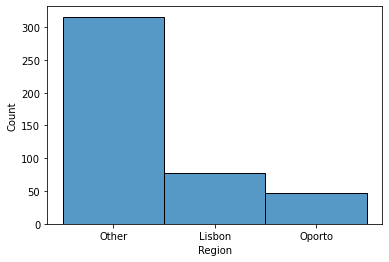

In [6]:
sns.histplot(data=df, x='Region')

<AxesSubplot:xlabel='Channel', ylabel='Count'>

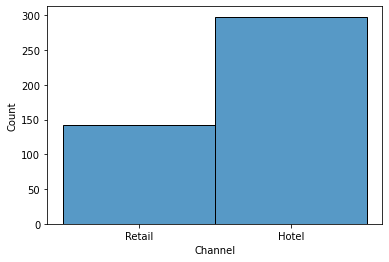

In [7]:
sns.histplot(data=df, x='Channel')

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer

# Mean and std. of 6 varieties in regions

In [8]:
df2= df.groupby(['Region'])['Total'].sum().sort_values
df2

<bound method Series.sort_values of Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64>

In [9]:
df.groupby(['Region'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].mean()

C:\Users\Sharmistha Nandy\AppData\Local\Temp\ipykernel_15264\4011905804.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Region'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.73,5486.42,7403.08,3000.34,2651.12,1354.90
Oporto,9887.68,5088.17,9218.60,4045.36,3687.47,1159.70
Other,12533.47,5977.09,7896.36,2944.59,2817.75,1620.60


In [10]:
df.groupby(['Region'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].std()

C:\Users\Sharmistha Nandy\AppData\Local\Temp\ipykernel_15264\950664651.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Region'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].std()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11557.44,5704.86,8496.29,3092.14,4208.46,1345.42
Oporto,8387.90,5826.34,10842.75,9151.78,6514.72,1050.74
Other,13389.21,7935.46,9537.29,4260.13,4593.05,3232.58


In [11]:
col5=['Lisbon', 'Oporto', 'Other']
col6= [11557.438575/11101.727273, 9887.680851/9887.680851, 13389.213115/12533.471519]
col7=[5704.856079/5486.415584, 5826.343145/5088.170213, 7935.463443/5977.085443]
col8=[8496.287728/7403.077922, 10842.745314/9218.595745, 9537.29/7896.36]
col9=[3092.143894/3000.34, 9151.78/4045.36,4260.12/2944.59]
col10=[4208.46/2651.12, 6514.72/3687.47, 4593.05/2817.75]
col11=[1345.42/1354.90,1050.74/1159.7, 3232.58/1620.6]
CV_region= pd.DataFrame().assign(Region=col5, Fresh=col6, Milk=col7, Grocery=col8, Frozen=col9,Detergents_Paper=col10, Delicatessen=col11)
CV_region

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,1.04,1.04,1.15,1.03,1.59,0.99
1,Oporto,1.00,1.15,1.18,2.26,1.77,0.91
2,Other,1.07,1.33,1.21,1.45,1.63,1.99


# Mean and std. of all 6 varieties in Channels

In [12]:
df1= df.groupby(['Channel'])['Total'].sum().sort_values
df1

<bound method Series.sort_values of Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64>

In [13]:
df.groupby(['Channel'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].mean()

C:\Users\Sharmistha Nandy\AppData\Local\Temp\ipykernel_15264\1647561978.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Channel'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
Retail,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44


In [14]:
df.groupby(['Channel'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].std()

C:\Users\Sharmistha Nandy\AppData\Local\Temp\ipykernel_15264\3823758683.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Channel'])['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen'].std()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
Retail,8987.71,9679.63,12267.32,1812.80,6291.09,1953.80


In [15]:
col12= ['Hotel', 'Retail']
col13= [13831.6875/13475.56, 8987.71475/8904.323944]
col14= [4352.16557/3451.7248, 9679.63/10716.5]
col15= [3545.51/3962.137584, 12267.318/16322.85]
col16= [5643.92/3748.25, 1812.80/1652.6126]
col17= [1104.0936/790.56, 6291.089/7269.51]
col18= [3148.43/1415.956, 1953.797/1753.4366]
CV_Channel= pd.DataFrame().assign(Channel=col12, Fresh=col13, Milk=col14, Grocery=col15, Frozen=col16,Detergents_Paper=col17, Delicatessen=col18)
CV_Channel

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,1.03,1.26,0.89,1.51,1.40,2.22
1,Retail,1.01,0.90,0.75,1.10,0.87,1.11


In [16]:
pd.crosstab(df['Region'],df['Channel'],margins='all')

pd.crosstab(df['Channel'],df['Region'],margins='all')

Region,Lisbon,Oporto,Other,All
Channel,,,,
Hotel,59,28,211,298
Retail,18,19,105,142
All,77,47,316,440


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [17]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
x=cv(df)
x

C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sharmistha Nandy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

Buyer/Spender       57.67
Fresh              105.39
Milk               127.33
Grocery            119.52
Frozen             158.03
Detergents_Paper   165.46
Delicatessen       184.94
Total               79.32
dtype: float64

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

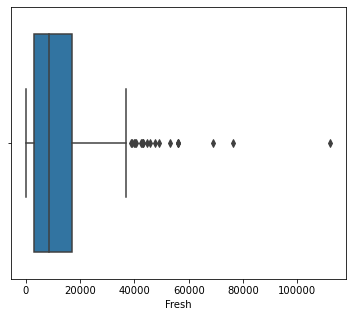

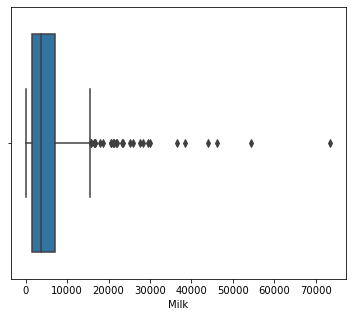

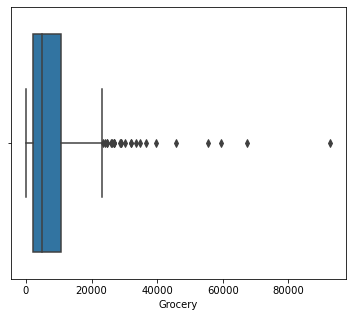

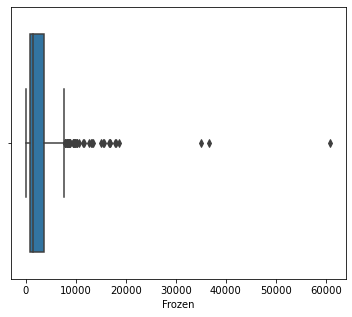

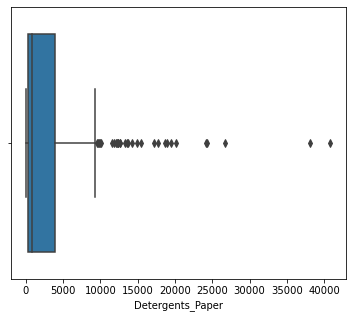

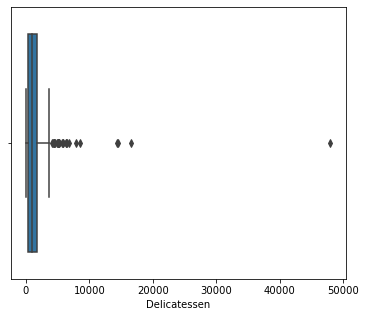

In [18]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['Fresh'])

plt.figure(figsize=(6,5))
sns.boxplot(x=df['Milk'])

plt.figure(figsize=(6,5))
sns.boxplot(x=df['Grocery'])

plt.figure(figsize=(6,5))
sns.boxplot(x=df['Frozen'])

plt.figure(figsize=(6,5))
sns.boxplot(x=df['Detergents_Paper'])

plt.figure(figsize=(6,5))
sns.boxplot(x=df['Delicatessen'])      

plt.show()

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

# For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [19]:
df_survey = pd.read_csv("C:\\Users\\Sharmistha Nandy\\Downloads\\Survey-1.csv")

In [20]:
pd.crosstab(df_survey['Gender'],df_survey['Major'], margins='all')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [21]:
pd.crosstab(df_survey['Gender'],df_survey['Grad Intention'], margins='all')

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [22]:
pd.crosstab(df_survey['Gender'],df_survey['Employment'], margins='all')

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [23]:
pd.crosstab(df_survey['Gender'],df_survey['Computer'], margins='all')

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [24]:
No_of_male = (df_survey['Gender'] =='Male').sum()
print(No_of_male)
No_of_female = (df_survey['Gender'] =='Female').sum()
print(No_of_female)
Total_value =df_survey['Gender'].value_counts().sum()
print(Total_value)

29
33
62


In [25]:
p_male = No_of_male/Total_value

print('The probability that a randomly selected CMSU student will be male',(p_male)*100)

The probability that a randomly selected CMSU student will be male 46.774193548387096


In [26]:
p_female = No_of_female/Total_value

print('The probability that a randomly selected CMSU student will be female',(p_female)*100)

The probability that a randomly selected CMSU student will be female 53.2258064516129


# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [27]:
pd.crosstab(df_survey['Gender'],df_survey['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
print('Among MALE candidates:')
print('Probability of studying Accounting:',4/29)
print('Probability of studying CIS:',1/29)
print('Probability of studying Economics/Finance:',4/29)
print('Probability of studying International Business:',2/29)
print('Probability of studying Management:',6/29)
print('Probability of studying Other:',4/29)
print('Probability of doing Retailing/Marketing:',5/29)
print('Probability of being Undecided:',3/29)
print()
print('Among FEMALE candidates:')
print('Probability of studying Accounting:',3/33)
print('Probability of studying CIS:',3/33)
print('Probability of studying Economics/Finance:',7/33)
print('Probability of studying International Business:',4/33)
print('Probability of studying Management:',4/33)
print('Probability of studying Other:',3/33)
print('Probability of doing Retailing/Marketing:',9/33)
print('Probability of being Undecided:',0/33)

Among MALE candidates:
Probability of studying Accounting: 0.13793103448275862
Probability of studying CIS: 0.034482758620689655
Probability of studying Economics/Finance: 0.13793103448275862
Probability of studying International Business: 0.06896551724137931
Probability of studying Management: 0.20689655172413793
Probability of studying Other: 0.13793103448275862
Probability of doing Retailing/Marketing: 0.1724137931034483
Probability of being Undecided: 0.10344827586206896

Among FEMALE candidates:
Probability of studying Accounting: 0.09090909090909091
Probability of studying CIS: 0.09090909090909091
Probability of studying Economics/Finance: 0.21212121212121213
Probability of studying International Business: 0.12121212121212122
Probability of studying Management: 0.12121212121212122
Probability of studying Other: 0.09090909090909091
Probability of doing Retailing/Marketing: 0.2727272727272727
Probability of being Undecided: 0.0


# Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
2.4.1. Find the probability that a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [29]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) = ",(17/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) =  0.27419354838709675


In [30]:
print("P(no Computer ∩ Female) = P (no Computer | Female) x P (Female) = ",(4/33) * (33/62))

P(no Computer ∩ Female) = P (no Computer | Female) x P (Female) =  0.06451612903225806


# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [31]:
df_survey['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [32]:
No_of_fulltime_emp = (df_survey['Employment'] =='Full-Time').sum()
No_of_fulltime_emp

10

In [33]:
No_of_male_fulltime_emp = ((df_survey['Employment'] =='Full-Time') & (df_survey['Gender'] =='Male')).sum()
No_of_male_fulltime_emp

7

In [34]:
df_survey.groupby(['Gender','Employment']).size()

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [35]:
p_of_male =No_of_male/Total_value
print(round((p_of_male), 4)*100)
p_of_fulltime_emp =No_of_fulltime_emp/Total_value
print(round((p_of_fulltime_emp), 4)*100)
p_of_male_fulltime_emp = No_of_male_fulltime_emp/Total_value
print(round((p_of_male_fulltime_emp), 4)*100)

46.77
16.13
11.29


In [36]:
p = p_of_male+p_of_fulltime_emp-p_of_male_fulltime_emp

print('The probability that a randomly chosen student is either a male or has full-time employment', p*100, '%')

The probability that a randomly chosen student is either a male or has full-time employment 51.61290322580645 %


# 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?¶

In [37]:
df_und = pd.crosstab(df_survey['Gender'],df_survey['Grad Intention'])

In [38]:
df_A = df_und.copy()

In [39]:
df_A.drop(['Undecided'], axis=1, inplace=True)

In [40]:
df_A

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?¶

In [41]:
pd.crosstab(df_survey['Gender'],df_survey['GPA'])

GPA,2.30,2.40,2.50,2.60,2.80,2.90,3.00,3.10,3.20,3.30,3.40,3.50,3.60,3.70,3.80,3.90
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [42]:
print('Probability that his/her GPA less than 3 is', (1+1+2+4+2+1+2+3+1)/(29+33))

Probability that his/her GPA less than 3 is 0.27419354838709675


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [43]:
pd.crosstab(df_survey['Gender'],df_survey['Salary'], margins='all')

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [44]:
print('Probability of male earns 50 or more is', (4+1+1+3+3+1+1)/29)
print()
print('Probability of female earns 50 or more is', (5+5+5+1+1+1)/33)

Probability of male earns 50 or more is 0.4827586206896552

Probability of female earns 50 or more is 0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

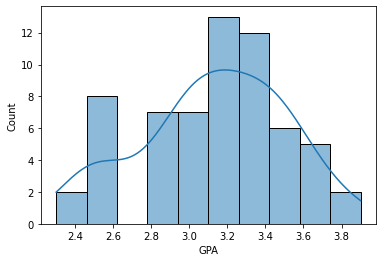

In [45]:
sns.histplot(data=df_survey, x='GPA', bins = 10, kde=True);

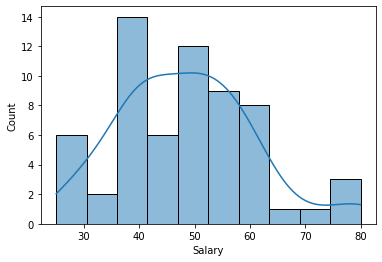

In [46]:
sns.histplot(data=df_survey, x='Salary', bins = 10, kde=True);

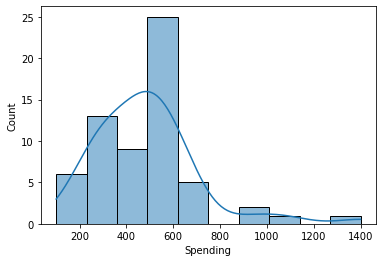

In [47]:
sns.histplot(data=df_survey, x='Spending', bins = 10, kde=True);

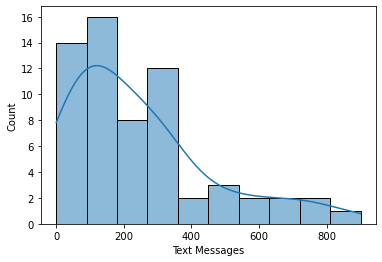

In [48]:
sns.histplot(data=df_survey, x='Text Messages', bins = 10, kde=True);

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [49]:
df = pd.read_csv("C:\\Users\\Sharmistha Nandy\\Downloads\\A+&+B+shingles.csv")

In [50]:
t_statistic, p_value = ttest_1samp(df['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [51]:
t_statistic, p_value = ttest_1samp(df['B'], 0.35,nan_policy= 'omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638365 


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [52]:
t_statistic, p_value = ttest_1samp(df['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [53]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513


In [54]:
t_statistic, p_value = ttest_1samp(df['B'], 0.35,nan_policy= 'omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [55]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our two-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our two-sample t-test p-value= 0.0020904774003191826
